<a href="https://colab.research.google.com/github/Maedeabm/Stroke-Prediction-Odyssey-From-Classic-Classifiers-to-Transformers/blob/main/Stroke_prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The process of building a Logistic Regression classifier on a stroke dataset from Kaggle

Data Loading:

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('stroke_dataset.csv')

Data Preprocessing:
Before building a model, it's essential to preprocess the data. Some typical preprocessing steps include handling missing values, encoding categorical variables, and scaling numerical ones.

In [ ]:
# Fill or drop missing values
data.dropna(inplace=True)

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1) # Assuming 'stroke' is the target column
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling:
For Logistic Regression, it's beneficial to scale the features, so each one has a similar scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training:
Now, you can train a Logistic Regression classifier.

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Model Evaluation:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



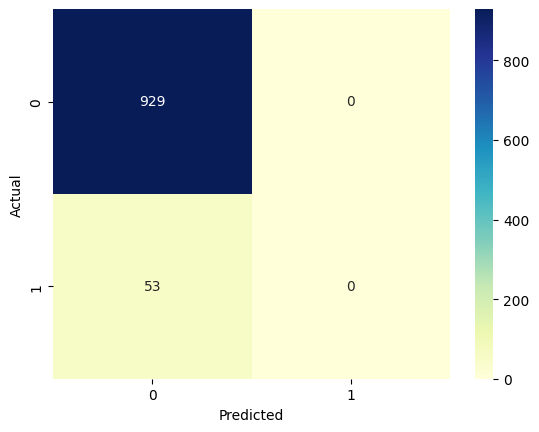

Accuracy: 0.9460285132382892
Root Mean Squared Error (RMSE): 0.23
Mean Absolute Error (MAE): 0.05
R^2 Score: -0.06


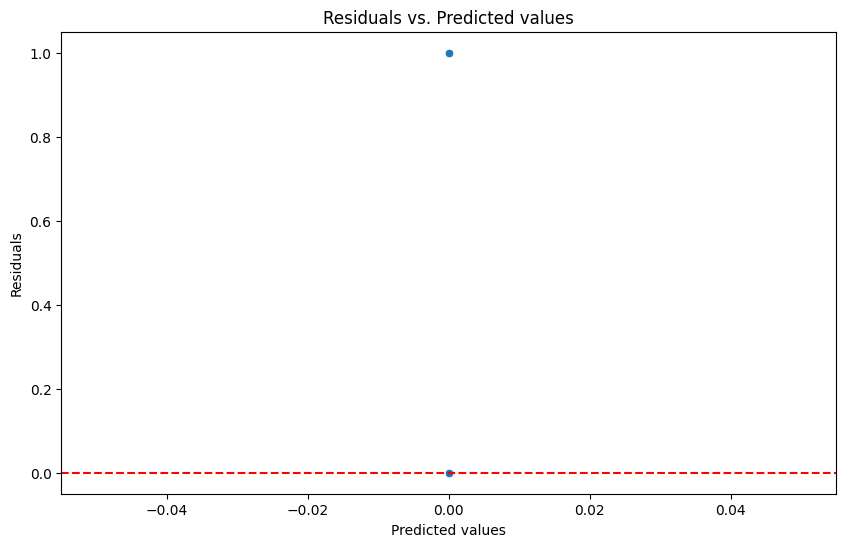

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate and print R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2:.2f}")

# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted values')
plt.show()


Explanation:

  
We first load the dataset and then perform some preprocessing.

For categorical columns, one-hot encoding is done to transform them into a machine-readable format.

The dataset is split into training and test sets to evaluate the model's performance.

Features are scaled so that they have similar scales, which helps in the convergence of Logistic Regression.

The Logistic Regression model is then trained on the training set.

After training, predictions are made on the test set, and various metrics (classification report, confusion matrix, accuracy) are used to evaluate the model's performance.

Finally, a visual representation of the confusion matrix is shown. This matrix helps in understanding the True Positives, True Negatives, False Positives, and False Negatives.

This is a basic setup and evaluation for a Logistic Regression classifier. Depending on the dataset's characteristics, there might be other preprocessing steps or hyperparameter tuning required for better performance.

Mean Squared Error (MSE): It's the average squared difference between the estimated values and the actual value. A smaller MSE indicates a better fit to the data.

Root Mean Squared Error (RMSE): This is just the square root of MSE. It gives an idea of the magnitude of the error.

R^2 Score: It represents the proportion of variance in the dependent variable that's explained by the independent variables. Closer to 1 is better.

Predicted vs. Actual Plot: A scatter plot between the predicted values and actual values. The closer this plot is to a 45-degree diagonal, the better the predictions.

Residuals Plot: It plots residuals (errors) against the predicted values. Ideally, residuals should be randomly scattered around the horizontal axis, indicating that the regression is appropriate for the data.